<h1> Actividad 2: Datos ausentes y normalización </h1>
<h3> Carmen Witsman García </h3>

Trabajaremos con un conjunto de datos que contiene NAs, imputaremos los datos faltantes por eliminación y normalizaremos utilizando la técnica z-score. Finalmente, comentaremos cuáles son las ventajas y desventajas de usar z-score para la normalización de datos numéricos en Python.

In [30]:
# Importamos las librerías 
import os
import pandas as pd
import numpy as np

# Establecemos directorio de trabajo
os.chdir("C:/Users/witsm/Desktop/Tratamiento D/Actividades/Actividad 2")

In [31]:
# Importamos los datos
datos = pd.read_csv("surveys.csv")
datos.head()
print(datos)

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35544      35545     12   31  2002       15         AH  NaN              NaN   
35545      35546     12   31  2002       15         AH  NaN              NaN   
35546      35547     12   31  2002       10         RM    F             15.0   
35547      35548     12   31  2002        7         DO    M             36.0   
35548      35549     12   31  2002        5        NaN  NaN              NaN   

       weight  
0         NaN  
1      

<h2> 1. Mecanismo de imputación </h2>

Utilizaremos el mecanismo de imputación de valores faltantes por eliminación, analizaremos los valores faltantes de las filas y de las columnas y eligiremos la política a seguir para eliminar valores.

Comentaremos los resultados y sugeriremos otras posibilidades para imputar los valores faltantes.

In [32]:
# Primero, vemos si hay valores faltantes en el dataset (NaN)
valores_na = datos.isnull().sum()
print(valores_na)

ratio_na = (valores_na / len(datos)) * 100
print(f"\n", ratio_na)

record_id             0
month                 0
day                   0
year                  0
plot_id               0
species_id          763
sex                2511
hindfoot_length    4111
weight             3266
dtype: int64

 record_id           0.000000
month               0.000000
day                 0.000000
year                0.000000
plot_id             0.000000
species_id          2.146333
sex                 7.063490
hindfoot_length    11.564320
weight              9.187319
dtype: float64


Como vemos, tenemos valores faltantes en las columnas: 

`species_id` (763), `sex` (2511), `hindfoot_length` (4111) y `weight` (3266)

Eliminaremos todas las filas que contengan valores faltantes, ya que los valores faltantes no llegan a presentar un alto porcentaje de los valores totales como para deshacernos de columnas enteras.

In [33]:
# Conjunto de datos sin NAs
datos_limpios = datos.dropna()
print(datos)

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35544      35545     12   31  2002       15         AH  NaN              NaN   
35545      35546     12   31  2002       15         AH  NaN              NaN   
35546      35547     12   31  2002       10         RM    F             15.0   
35547      35548     12   31  2002        7         DO    M             36.0   
35548      35549     12   31  2002        5        NaN  NaN              NaN   

       weight  
0         NaN  
1      

In [34]:
# Análisis 
# ---------------------------------------

# Definimos la variable respuesta (y) y las variables explicativas (X)
variables_explicativas = ["weight", "month", "day", "year", "plot_id"]
y = datos_limpios['hindfoot_length']
X = datos_limpios[variables_explicativas]

# Verificamos si hay valores nulos en la variable dependiente 'hindfoot_leght' en el DataFrame limpio
print("¿Hay valores nulos en la variable dependiente 'hindfoot_leght'?")
print(datos_limpios['hindfoot_length'].isnull().any())

# Mostrar el número de observaciones en los conjuntos de datos X e y
print("\nNúmero de observaciones en el conjunto de datos X (variables explicativas):", X.shape[0])
print("Número de observaciones en el conjunto de datos y (variable dependiente):", y.shape[0])

¿Hay valores nulos en la variable dependiente 'hindfoot_leght'?
False

Número de observaciones en el conjunto de datos X (variables explicativas): 30676
Número de observaciones en el conjunto de datos y (variable dependiente): 30676


Vemos que tras la eliminación de valores faltantes, definiendo una variable respuesta y explicativas, hemos limpiado por completo el dataset de valores nulos.

Al principio, teníamos un dataset con 35549 filas, y tras aplicar la imputación por eliminación, nos hemos quedado con un dataset de 30676 filas. Eso quiere decir que implementando este mecanismo de imputación, nos hemos deshecho de 4873 filas (un 13,7% del dataset inicial).

Por lo tanto, como método de imputación podemos decir que no es el mejor, pero tratándose de un dataset tan grande, la pérdida no es tan significativa. Así que, ¿qué otras alternativas hay?

Tomando variables numéricas, podríamos imputar por la mediana si afectase una cantidad considerable de valores atípicos, imputar por la media, o mediante método MICE o árbol de regresión. El más efectivo es el método k-means. Luego, eliminaríamos las filas afectadas por los NAs de `species_id` y `sex`, ya que son variables categóricas.

In [35]:
# Alternativa de imputación: k-means
variables_explicativas = ["weight", "month", "day", "year", "plot_id"]
y = datos_limpios['hindfoot_length']
X = datos_limpios[variables_explicativas]

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)

# Ajustar el modelo de regresion mediante arboles de decisiones
model = LinearRegression()
model.fit(X_imputed, y)

# Predecir los valores de y utilizando el modelo ajustado
y_pred = model.predict(X_imputed)

# Calcular el coeficiente de determinación (R^2)
score_knn = r2_score(y, y_pred)
print("Coeficiente de determinación (R^2):", score_knn)

Coeficiente de determinación (R^2): 0.48439741394218383


Vemos que el coeficiente de determinación es significativamente bueno, lo que sería una buena alternativa imputar valores numéricos faltantes por el método k-means.

<h2> 2. Normalización </h2>
Aplicaremos la técnica de normalización de Z-Score a los datos numéricos. Unificaremos los datos numéricos normalizados y los datos categóricos en un solo dataframe. Comentaremos las ventajas o desventajas de la técnica de Z-Score.

In [36]:

# Normalizamos los datos numéricos con la técnica Z-Score

columnas_numericas = ["weight", "month", "day", "year", "plot_id", "hindfoot_length"]
datos_numericos = datos_limpios[columnas_numericas]

import scipy.stats as ss

datos_z = ss.zscore(datos_numericos)
datos_z


,weight,month,day,year,plot_id,hindfoot_length
62,-0.050217,0.420330,0.361578,-1.89880,-1.20984,0.606488
63,0.174045,0.420330,0.361578,-1.89880,-0.62140,0.816106
64,-0.358577,0.420330,0.361578,-1.89880,-1.06273,0.501679
65,0.117979,0.420330,0.361578,-1.89880,-1.06273,0.606488
66,-0.162348,0.420330,0.361578,-1.89880,-0.62140,0.606488
...,...,...,...,...,...,...
35540,-0.302511,1.581849,1.832650,1.49669,0.55548,-0.546410
35541,-0.358577,1.581849,1.832650,1.49669,0.55548,-0.336792
35542,-0.218413,1.581849,1.832650,1.49669,0.55548,-0.231983
35546,-0.779067,1.581849,1.832650,1.49669,-0.18007,-1.489690


In [37]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Your code here

# Reemplazamos los datos numéricos por los datos normalizados

datos_limpios[columnas_numericas] = datos_z
print(datos_limpios)


       record_id     month       day     year  plot_id species_id sex  \
62            63  0.420330  0.361578 -1.89880 -1.20984         DM   M   
63            64  0.420330  0.361578 -1.89880 -0.62140         DM   M   
64            65  0.420330  0.361578 -1.89880 -1.06273         DM   F   
65            66  0.420330  0.361578 -1.89880 -1.06273         DM   F   
66            67  0.420330  0.361578 -1.89880 -0.62140         DM   M   
...          ...       ...       ...      ...      ...        ...  ..   
35540      35541  1.581849  1.832650  1.49669  0.55548         PB   F   
35541      35542  1.581849  1.832650  1.49669  0.55548         PB   F   
35542      35543  1.581849  1.832650  1.49669  0.55548         PB   F   
35546      35547  1.581849  1.832650  1.49669 -0.18007         RM   F   
35547      35548  1.581849  1.832650  1.49669 -0.62140         DO   M   

       hindfoot_length    weight  
62            0.606488 -0.050217  
63            0.816106  0.174045  
64            0.50

------------------------
Ventajas y desventajas de usar la técnica Z-score para normalizar datos en Python
===================================================================================

<h3> 1. Ventajas: </h3>

* `Simplicidad`: La técnica Z-score es muy fácil de entender e implementar en Python. Solo requiere restar la media y dividir por la desviación estándar.

* `Interpretación`: Los valores Z-score expresan las distancias en unidades de desviación estándar respecto a la media, lo que facilita la comparación de valores entre diferentes características.

* `Robustez`: La técnica Z-score es robusta a valores atípicos, ya que no se ve afectada por valores extremos.

* `Estandarización`: Permite que los algoritmos de aprendizaje automático se centren en las relaciones entre las características en lugar de su magnitud absoluta.

<h3> 2. Desventajas: </h3>

* `Pérdida de información`: La técnica Z-score transforma los datos originales en una nueva escala, lo que puede implicar una pérdida de información sobre la distribución original de los datos.

* ` Dependencia de la distribución`: Si los datos no siguen una distribución normal, la normalización Z-score puede no ser efectiva e incluso puede distorsionar las relaciones entre las características.

* `Sensibilidad a outliers`: Aunque la técnica Z-score es robusta a outliers, si hay muchos outliers en el conjunto de datos, la normalización Z-score puede verse afectada.

* `Escalas diferentes`: La técnica Z-score normaliza los datos a una escala con media 0 y desviación estándar 1, lo que puede ser un problema si las características tienen escalas diferentes.

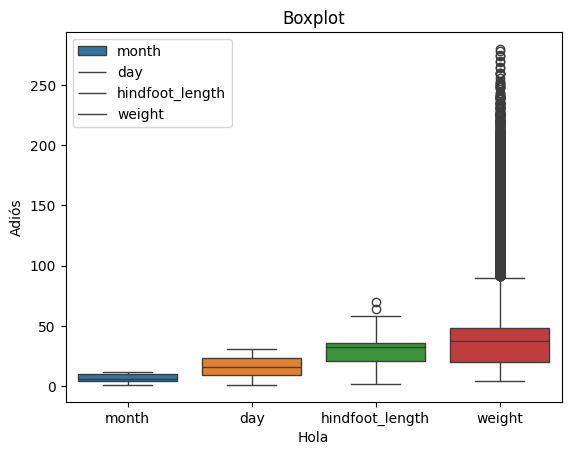

In [43]:
import seaborn as sns
varrr = ['month', 'day', 'hindfoot_length', 'weight']
datos_prueba = datos[varrr]
datos_prueba

import matplotlib.pyplot as plt

sns.boxplot(datos_prueba)
plt.title("Boxplot")
plt.xlabel("Hola")
plt.ylabel("Adiós")
plt.legend(varrr)
plt.show()